In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = "crime_data_cleaned.csv"   # change path if needed
crime_df = pd.read_csv(file_path)

# Preview
crime_df.head()


,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed
0,1,02-01-2020 00:00,01-01-2020 00:00,01-01-2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No
1,2,01-01-2020 19:00,01-01-2020 01:00,01-01-2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No
2,3,02-01-2020 05:00,01-01-2020 02:00,01-01-2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No
3,4,01-01-2020 05:00,01-01-2020 03:00,01-01-2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes
4,5,01-01-2020 21:00,01-01-2020 04:00,01-01-2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes


In [14]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [24]:
# Convert date columns
crime_df['Date Reported'] = pd.to_datetime(crime_df['Date Reported'], errors='coerce')
crime_df['Date of Occurrence'] = pd.to_datetime(crime_df['Date of Occurrence'], errors='coerce')
crime_df['Time of Occurrence'] = pd.to_datetime(crime_df['Time of Occurrence'], errors='coerce')

# Extract features
crime_df['Year'] = crime_df['Date of Occurrence'].dt.year
crime_df['Month'] = crime_df['Date of Occurrence'].dt.month
crime_df['Day'] = crime_df['Date of Occurrence'].dt.day
crime_df['Weekday'] = crime_df['Date of Occurrence'].dt.day_name()
crime_df['Hour'] = crime_df['Time of Occurrence'].dt.hour

crime_df[['Date of Occurrence','Year','Month','Weekday','Hour']].head()


,Date of Occurrence,Year,Month,Weekday,Hour
0,2020-01-01 00:00:00,2020,1,Wednesday,1.0
1,2020-01-01 01:00:00,2020,1,Wednesday,6.0
2,2020-01-01 02:00:00,2020,1,Wednesday,14.0
3,2020-01-01 03:00:00,2020,1,Wednesday,14.0
4,2020-01-01 04:00:00,2020,1,Wednesday,16.0


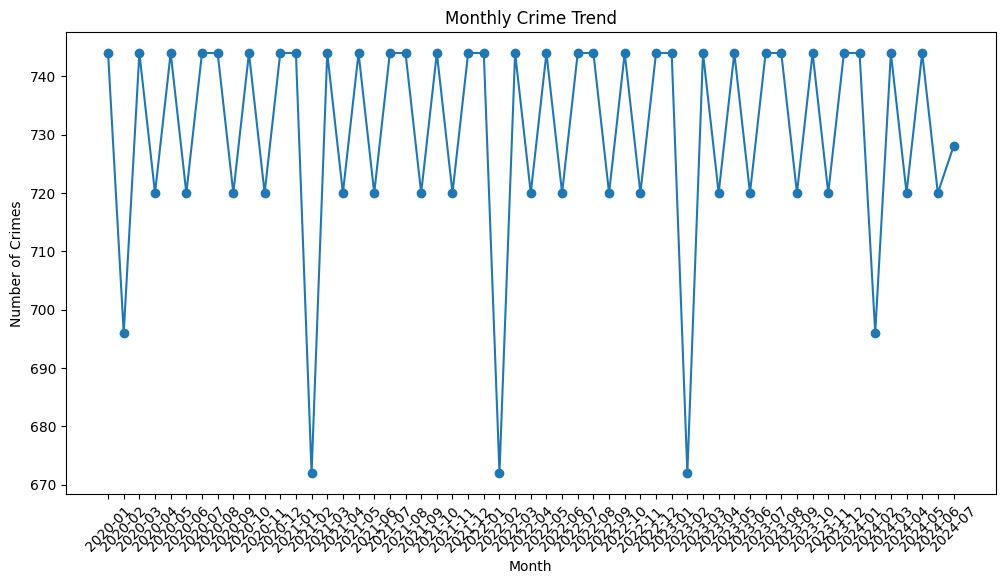

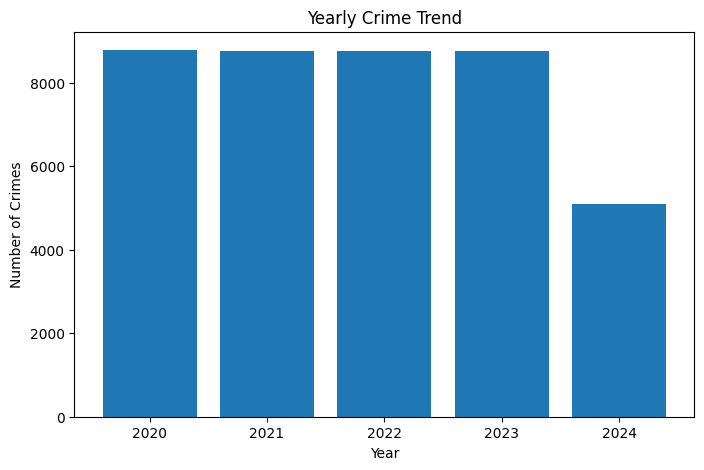

In [25]:
# Monthly trend
monthly_trend = crime_df.groupby(crime_df['Date of Occurrence'].dt.to_period('M')).size()

plt.figure(figsize=(12,6))
plt.plot(monthly_trend.index.astype(str), monthly_trend.values, marker='o')
plt.title("Monthly Crime Trend")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45)
plt.show()

# Yearly trend
yearly_trend = crime_df.groupby('Year').size()

plt.figure(figsize=(8,5))
plt.bar(yearly_trend.index, yearly_trend.values)
plt.title("Yearly Crime Trend")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.show()


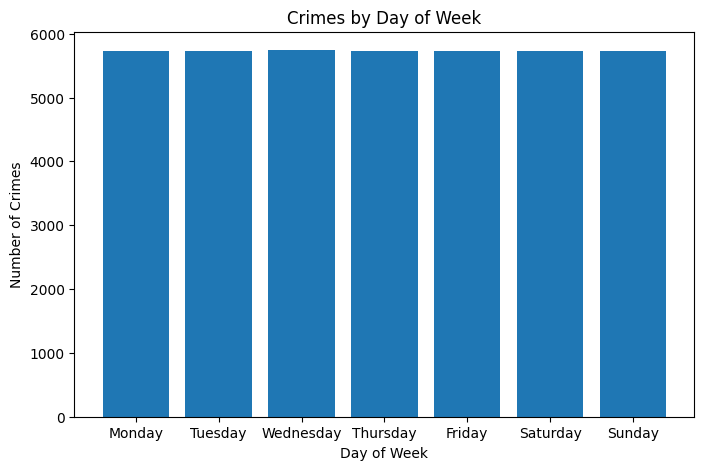

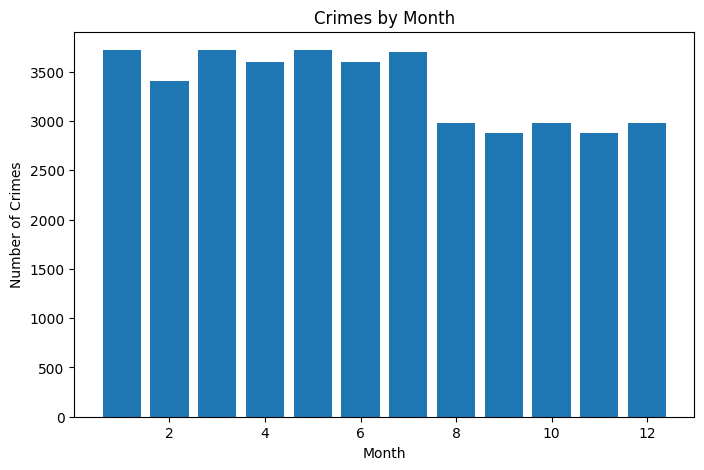

In [26]:
# Crimes by weekday
weekday_counts = crime_df['Weekday'].value_counts().reindex(
    ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
)

plt.figure(figsize=(8,5))
plt.bar(weekday_counts.index, weekday_counts.values)
plt.title("Crimes by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Crimes")
plt.show()

# Crimes by month (1–12)
month_counts = crime_df['Month'].value_counts().sort_index()

plt.figure(figsize=(8,5))
plt.bar(month_counts.index, month_counts.values)
plt.title("Crimes by Month")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.show()


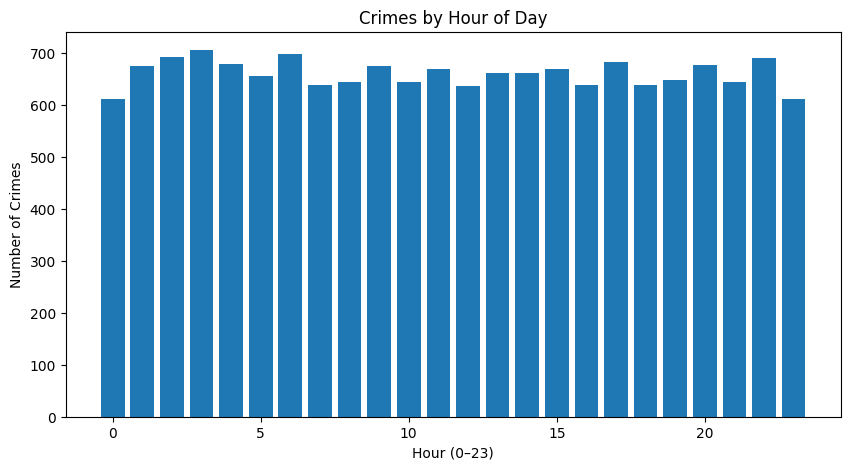

In [27]:
# Crimes by hour
hourly_counts = crime_df['Hour'].value_counts().sort_index()

plt.figure(figsize=(10,5))
plt.bar(hourly_counts.index, hourly_counts.values)
plt.title("Crimes by Hour of Day")
plt.xlabel("Hour (0–23)")
plt.ylabel("Number of Crimes")
plt.show()


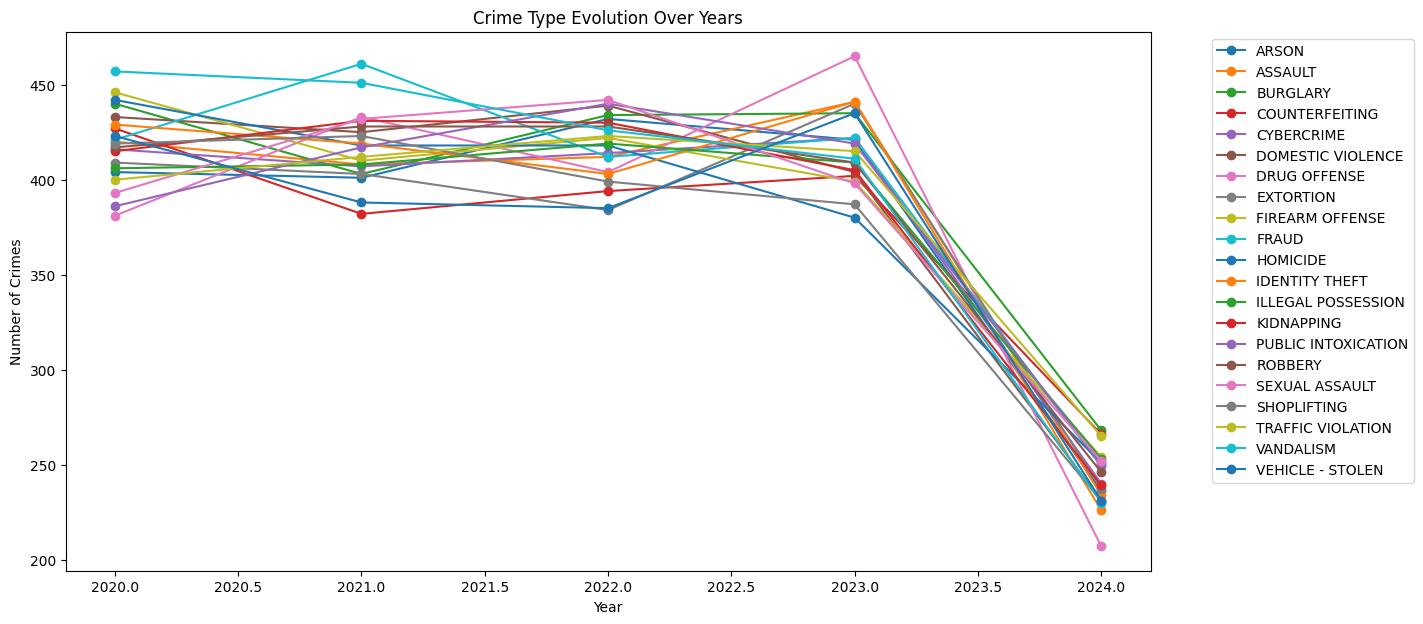

In [28]:
# Crimes by type over years
crime_type_trend = crime_df.groupby(['Year','Crime Description']).size().unstack(fill_value=0)

plt.figure(figsize=(14,7))
for col in crime_type_trend.columns:
    plt.plot(crime_type_trend.index, crime_type_trend[col], marker='o', label=col)

plt.title("Crime Type Evolution Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


<Figure size 1000x600 with 0 Axes>

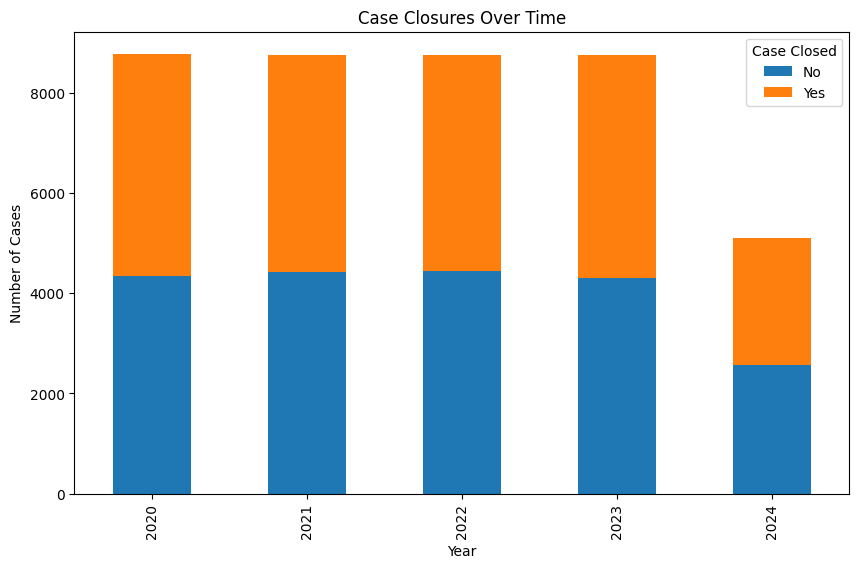

In [29]:
# Case closures by year
closure_trend = crime_df.groupby(['Year','Case Closed']).size().unstack(fill_value=0)

plt.figure(figsize=(10,6))
closure_trend.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("Case Closures Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Cases")
plt.show()


In [30]:
# Aggregate daily
crime_daily = crime_df.groupby('Date of Occurrence').size().reset_index(name='Crime Count')

# Prepare for Prophet
crime_daily = crime_daily.rename(columns={'Date of Occurrence':'ds','Crime Count':'y'})

crime_daily.head()


,ds,y
0,2020-01-01 00:00:00,1
1,2020-01-01 01:00:00,1
2,2020-01-01 02:00:00,1
3,2020-01-01 03:00:00,1
4,2020-01-01 04:00:00,1
